# Data analysis 





## Load packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from Titantic.data import missing_data
from Titantic.data import data_frequency
from Titantic.data import unique_vals
from Titantic.data import survival_rate
from Titantic.feature_engineering import feature_eng

In [2]:
# TODO: Add all hard coded parameters like file paths or model parameters here
TRAIN_PATH = "train.csv"
TEST_PATH = "test.csv"

## Read the data

In [3]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

train_df = feature_eng(train_df)
all_df = feature_eng(train_df, df2 = test_df, agg=True)

c:\Users\danil\Documents\EconDS\Courses\D100\Assignments\PS_1\Titantic\Titantic\feature_engineering.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Single' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Family Size"] == 1, "Family Type"] = "Single"
c:\Users\danil\Documents\EconDS\Courses\D100\Assignments\PS_1\Titantic\Titantic\feature_engineering.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Single' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Family Size"] == 1, "Family Type"] = "Single"


# Preliminary data inspection

## Quick glimpse of the data
TODO: Think if you can abstract away much here.

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Few statistics on the data

### Missing data

In [10]:
# TODO: turn into function
df_missing_train = missing_data(train_df)

df_missing_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,177,0,0,0,0,687,2
Percent,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [11]:
# TODO: turn into function
df_missing_test = missing_data(test_df)

df_missing_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,86,0,0,0,1,327,0
Percent,0.0,0.0,0.0,0.0,20.574163,0.0,0.0,0.0,0.239234,78.229665,0.0
Types,int64,int64,object,object,float64,int64,int64,object,float64,object,object


### Most frequent data

In [12]:
# TODO: turn into function
data_freq_train = data_frequency(train_df)

data_freq_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
Frequence,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


In [13]:
# TODO: turn into function
data_freq_test = data_frequency(test_df)

data_freq_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,418,418,418,418,332,418,418,418,417,91,418
Most frequent item,892,3,"Kelly, Mr. James",male,21.0,0,0,PC 17608,7.75,B57 B59 B63 B66,S
Frequence,1,218,1,266,17,283,324,5,21,3,270
Percent from total,0.239,52.153,0.239,63.636,5.12,67.703,77.512,1.196,5.036,3.297,64.593


### Unique values

In [14]:
# TODO: turn into function
unique_val_train = unique_vals(train_df)
unique_val_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Uniques,891,2,3,891,2,88,7,7,681,248,147,3


In [15]:
# TODO: turn into function
unique_val_test = unique_vals(test_df)
unique_val_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,418,418,418,418,332,418,418,418,417,91,418
Uniques,418,3,418,2,79,7,8,363,169,76,3


# Exploratory data analysis

## Univariate analysis for all features


We show here two graphs in paralel:
* distribution of class values, split per Survived value
* comparison of class values, in train and test data


Let's first aggregate train and test data into one single dataframe, `all_df`.

In [17]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


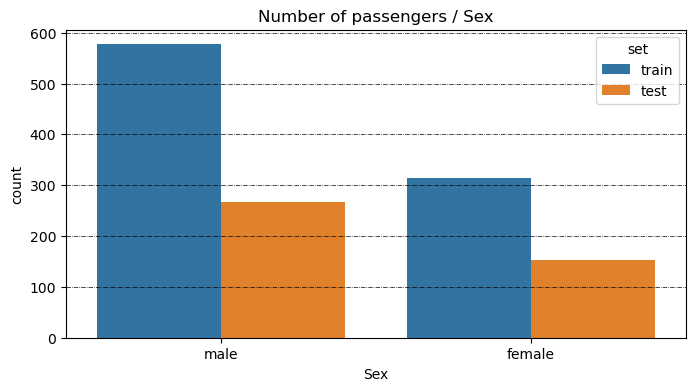

In [18]:
# Plot count pairs "Sex"
f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x="Sex", data=all_df, hue="set")
plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
ax.set_title("Number of passengers / Sex")
plt.show()  

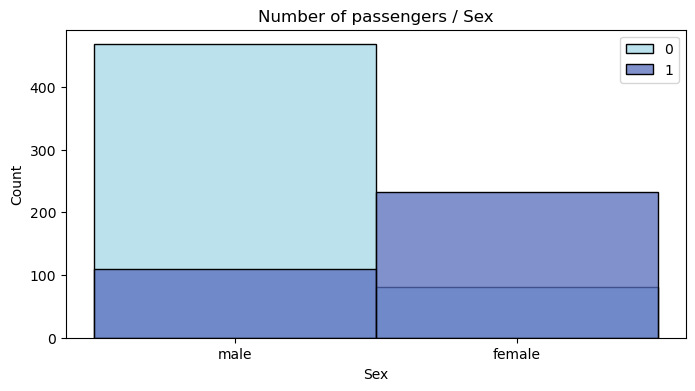

In [19]:
# Plot distribution pairs for "Sex" and hue as "Survived"
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"]
f, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, h in enumerate(train_df["Survived"].unique()):
    g = sns.histplot(train_df.loc[train_df["Survived"]==h, "Sex"], 
                                  color=color_list[i], 
                                  ax=ax, 
                                  label=h)
ax.set_title("Number of passengers / Sex")
g.legend()
plt.show()

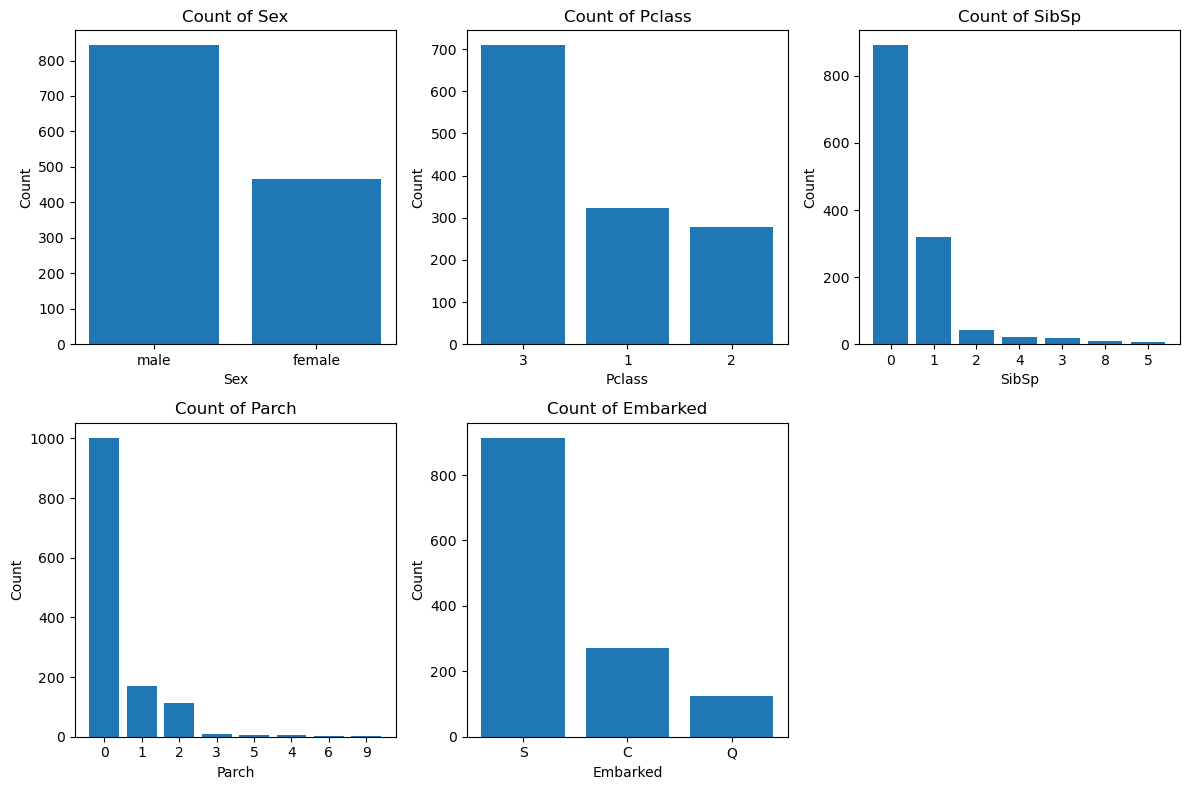

In [20]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked
variables = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, var in enumerate(variables):
    counts = all_df[var].value_counts()
    axes[i].bar(counts.index.astype(str), counts.values)
    axes[i].set_title(f"Count of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


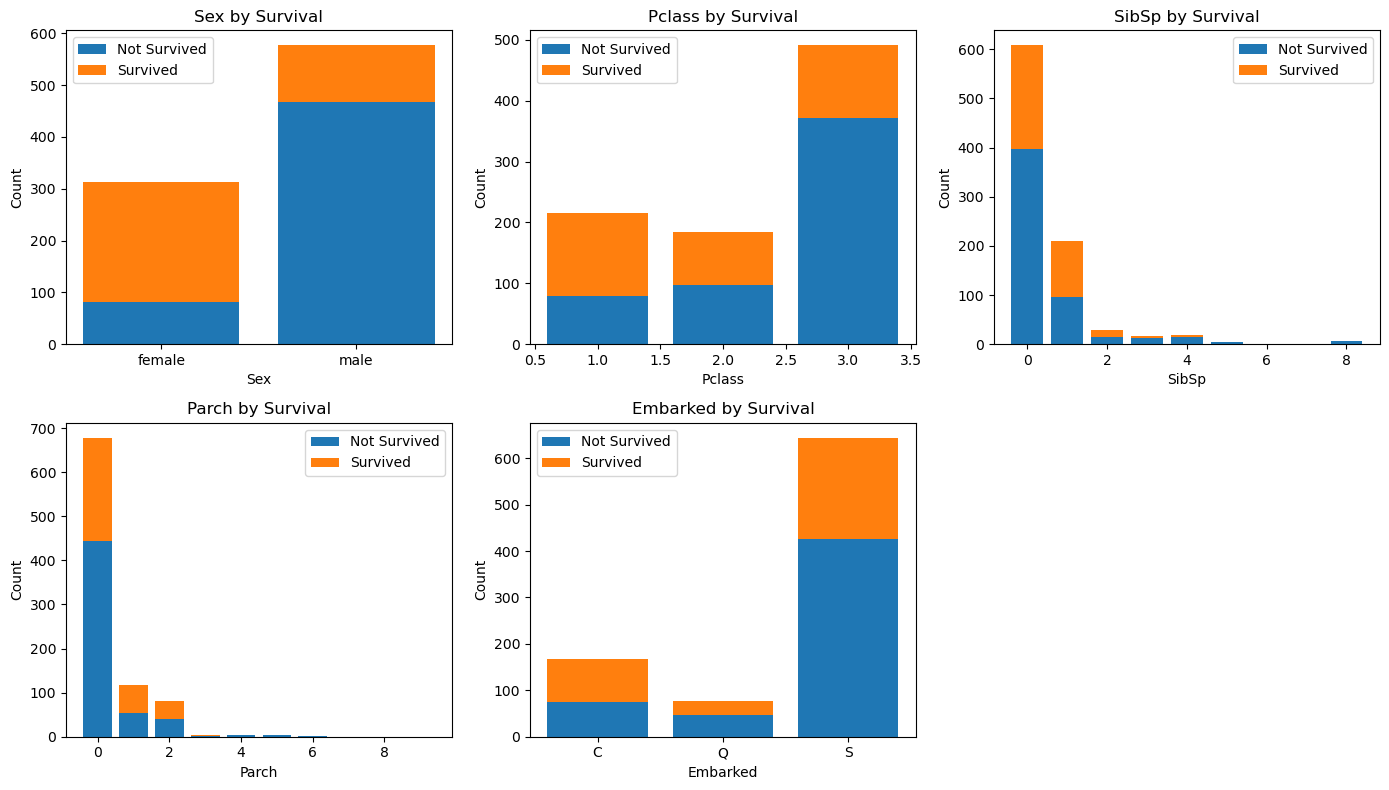

In [21]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked and use "Survived" as hue.
variables = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, var in enumerate(variables):
    survived_counts = all_df[all_df["Survived"] == 1][var].value_counts().sort_index()
    not_survived_counts = all_df[all_df["Survived"] == 0][var].value_counts().sort_index()

    categories = sorted(all_df[var].dropna().unique(), key=lambda x: str(x))

    survived = [survived_counts.get(cat, 0) for cat in categories]
    not_survived = [not_survived_counts.get(cat, 0) for cat in categories]

    axes[i].bar(categories, not_survived, label='Not Survived')
    axes[i].bar(categories, survived, bottom=not_survived, label='Survived')
    axes[i].set_title(f"{var} by Survival")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")
    axes[i].legend()

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

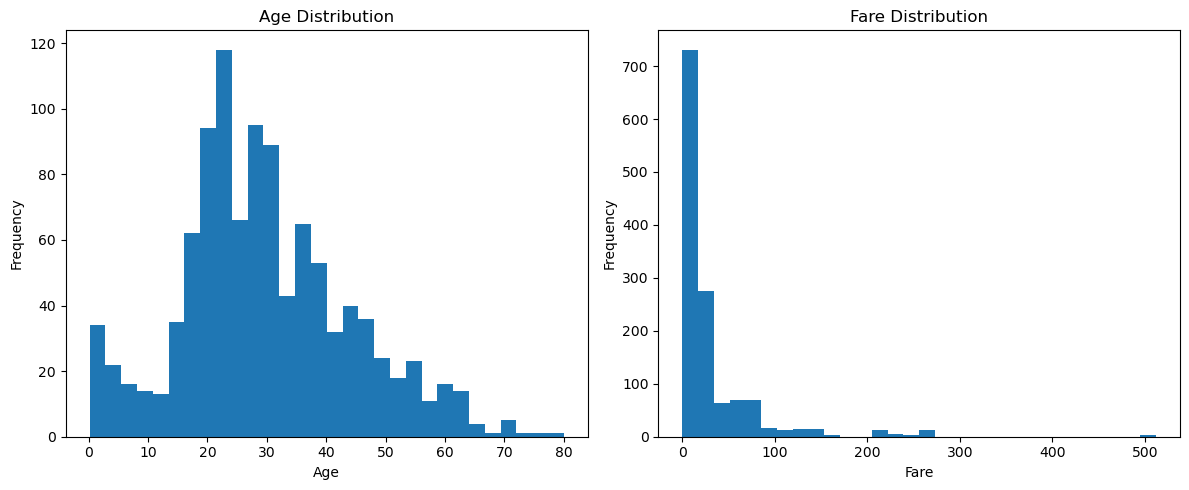

In [22]:
# Plot distribution pairs for Age and Fare
plt.figure(figsize=(12,5))

# Age distribution
plt.subplot(1,2,1)
plt.hist(all_df["Age"].dropna(), bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Fare distribution
plt.subplot(1,2,2)
plt.hist(all_df["Fare"].dropna(), bins=30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

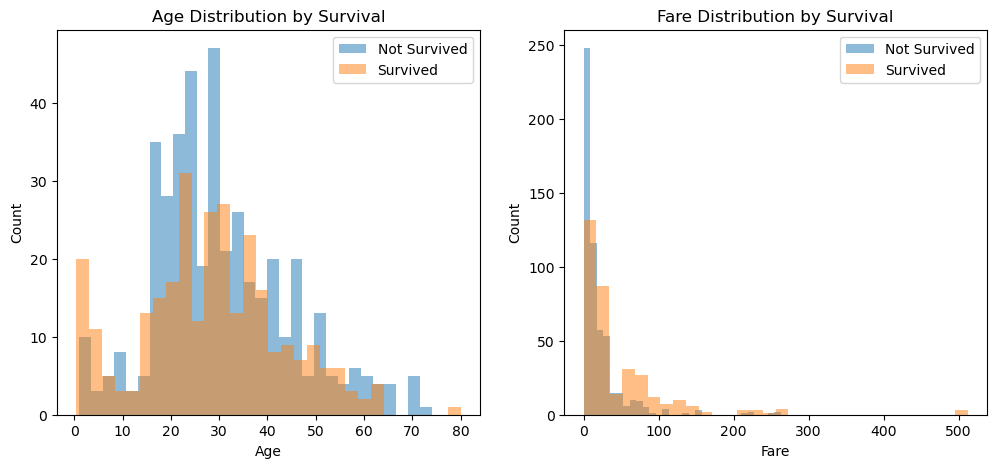

In [23]:
# Plot distribution pairs for Age and Fare using "Survived" as hue
plt.figure(figsize=(12,5))

# Age distribution by survival
plt.subplot(1,2,1)
plt.hist(all_df[all_df["Survived"]==0]["Age"].dropna(), bins=30, alpha=0.5, label="Not Survived")
plt.hist(all_df[all_df["Survived"]==1]["Age"].dropna(), bins=30, alpha=0.5, label="Survived")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()

# Fare distribution by survival
plt.subplot(1,2,2)
plt.hist(all_df[all_df["Survived"]==0]["Fare"].dropna(), bins=30, alpha=0.5, label="Not Survived")
plt.hist(all_df[all_df["Survived"]==1]["Fare"].dropna(), bins=30, alpha=0.5, label="Survived")
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend()

## Family size


Based on SibSp (sibilings or spouse) and Parch (parents or children), we set the Family Size field.

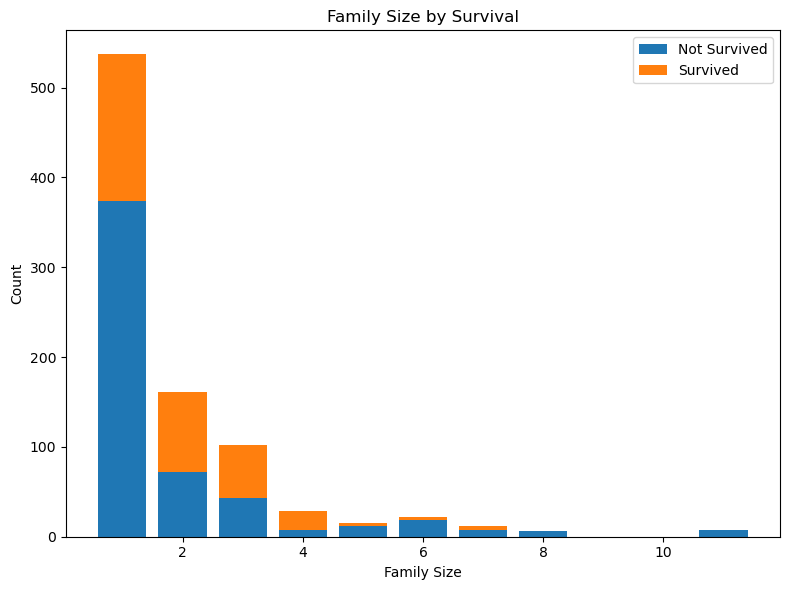

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

survived_counts = all_df[all_df["Survived"] == 1]["Family Size"].value_counts().sort_index()
not_survived_counts = all_df[all_df["Survived"] == 0]["Family Size"].value_counts().sort_index()

categories = sorted(all_df["Family Size"].dropna().unique())

survived = [survived_counts.get(cat, 0) for cat in categories]
not_survived = [not_survived_counts.get(cat, 0) for cat in categories]

ax.bar(categories, not_survived, label="Not Survived")
ax.bar(categories, survived, bottom=not_survived, label="Survived")
ax.set_title("Family Size by Survival")
ax.set_xlabel("Family Size")
ax.set_ylabel("Count")
ax.legend()

plt.tight_layout()
plt.show()

## Age interval

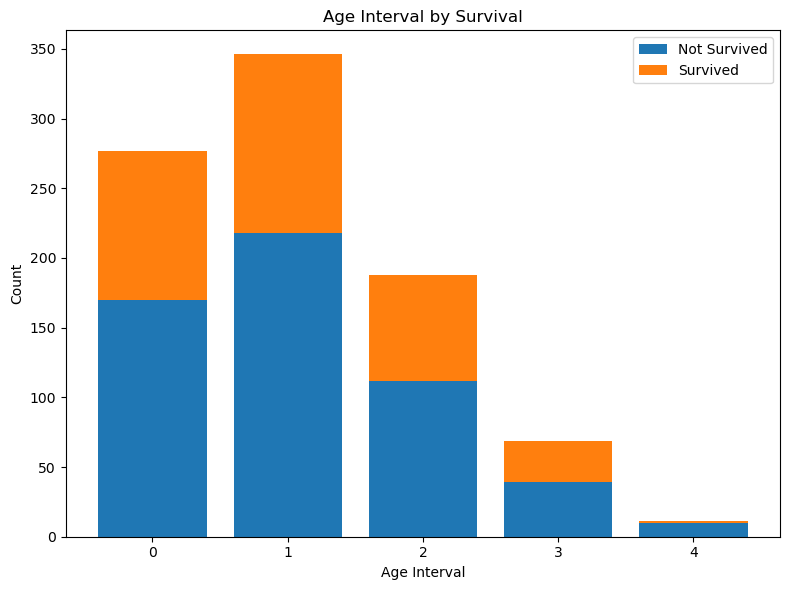

In [30]:
# Plot count pairs using all_df for the column "Age Interval" and use "Survived" as hue.
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

survived_counts = all_df[all_df["Survived"] == 1]["Age Interval"].value_counts().sort_index()
not_survived_counts = all_df[all_df["Survived"] == 0]["Age Interval"].value_counts().sort_index()

categories = sorted(all_df["Age Interval"].dropna().unique())

survived = [survived_counts.get(cat, 0) for cat in categories]
not_survived = [not_survived_counts.get(cat, 0) for cat in categories]

ax.bar(categories, not_survived, label="Not Survived")
ax.bar(categories, survived, bottom=not_survived, label="Survived")
ax.set_title("Age Interval by Survival")
ax.set_xlabel("Age Interval")
ax.set_ylabel("Count")
ax.legend()

plt.tight_layout()
plt.show()


## Fare interval

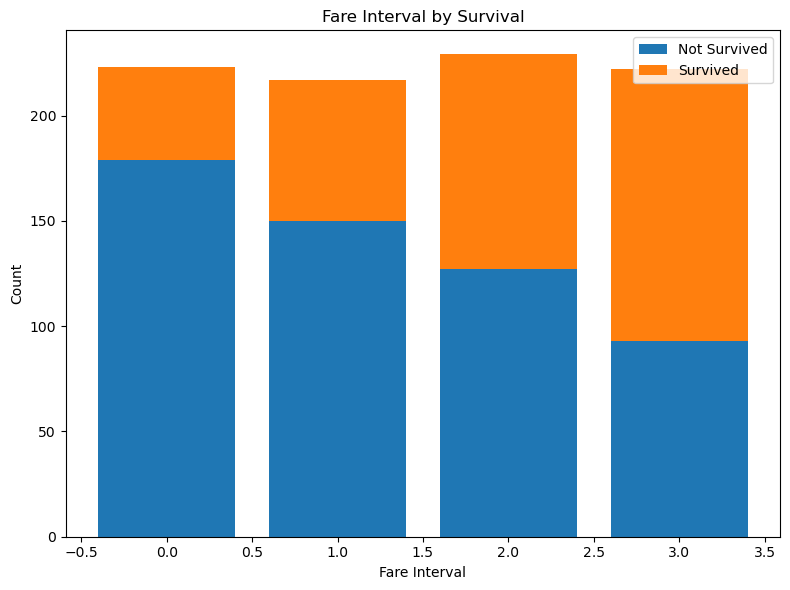

In [33]:
# Plot count pairs using all_df for the column "Fare Interval"
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

survived_counts = all_df[all_df["Survived"] == 1]["Fare Interval"].value_counts().sort_index()
not_survived_counts = all_df[all_df["Survived"] == 0]["Fare Interval"].value_counts().sort_index()

categories = sorted(all_df["Fare Interval"].dropna().unique())

survived = [survived_counts.get(cat, 0) for cat in categories]
not_survived = [not_survived_counts.get(cat, 0) for cat in categories]

ax.bar(categories, not_survived, label="Not Survived")
ax.bar(categories, survived, bottom=not_survived, label="Survived")
ax.set_title("Fare Interval by Survival")
ax.set_xlabel("Fare Interval")
ax.set_ylabel("Count")
ax.legend()

plt.tight_layout()
plt.show()

Let's create a composed feature: Pclass + Sex.

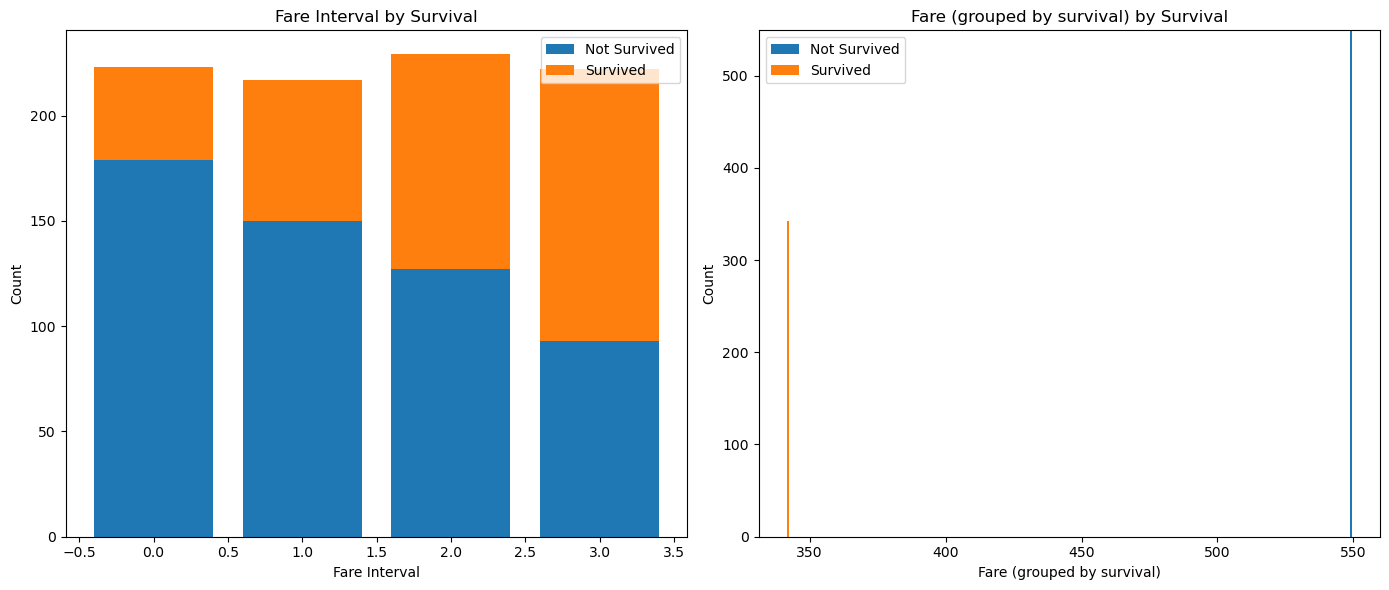

In [36]:
# Plot count pairs using all_df for the column "Fare Interval" and "Fare (grouped by survival)" with "Survived" as hue

all_df["Fare (grouped by survival)"] = all_df.groupby("Survived")["Fare"].transform("count")

variables = ["Fare Interval", "Fare (grouped by survival)"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, var in enumerate(variables):
    survived_counts = all_df[all_df["Survived"] == 1][var].value_counts().sort_index()
    not_survived_counts = all_df[all_df["Survived"] == 0][var].value_counts().sort_index()

    categories = sorted(all_df[var].dropna().unique(), key=lambda x: str(x))

    survived = [survived_counts.get(cat, 0) for cat in categories]
    not_survived = [not_survived_counts.get(cat, 0) for cat in categories]

    axes[i].bar(categories, not_survived, label="Not Survived")
    axes[i].bar(categories, survived, bottom=not_survived, label="Survived")
    axes[i].set_title(f"{var} by Survival")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")
    axes[i].legend()

plt.tight_layout()
plt.show()

## Multivariate analysis


Let's look now to the interaction of multiple features.

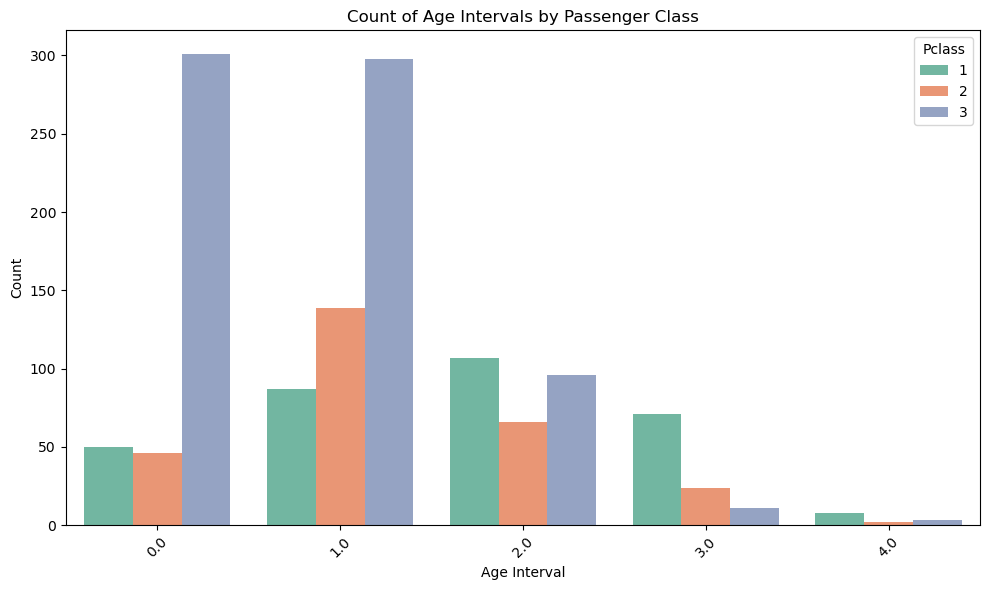

In [39]:
# TODO: Plot count pairs of "Age Interval" grouped by "Pclass"
plt.figure(figsize=(10,6))
sns.countplot(data=all_df, x="Age Interval", hue="Pclass", palette="Set2")
plt.title("Count of Age Intervals by Passenger Class")
plt.xlabel("Age Interval")
plt.ylabel("Count")
plt.legend(title="Pclass")
plt.xticks(rotation=45)  # rotate x-axis labels if needed
plt.tight_layout()
plt.show()

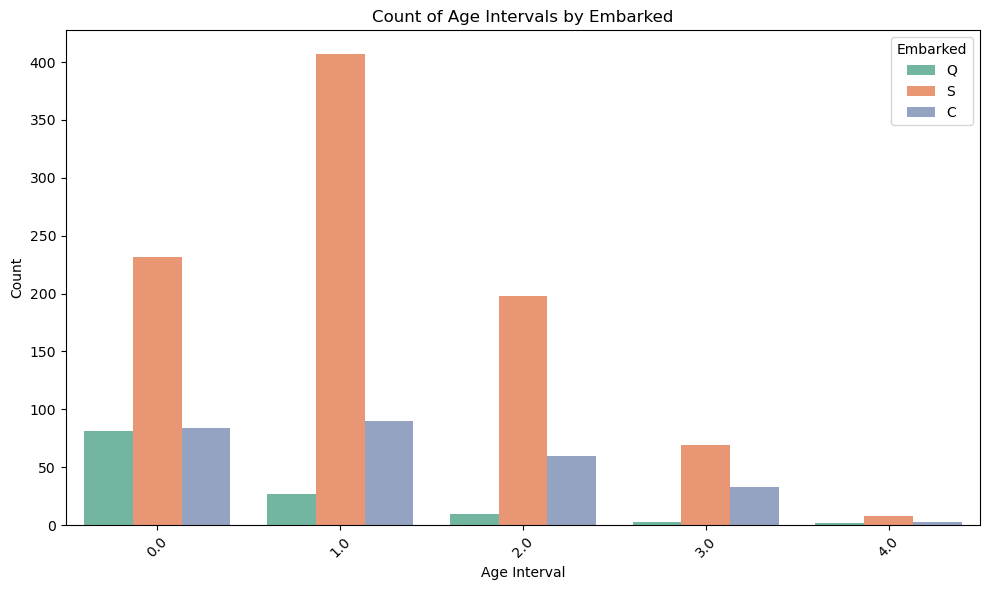

In [40]:
# TODO: Plot count pairs of "Age Interval" grouped by "Embarked"
plt.figure(figsize=(10,6))
sns.countplot(data=all_df, x="Age Interval", hue="Embarked", palette="Set2")
plt.title("Count of Age Intervals by Embarked")
plt.xlabel("Age Interval")
plt.ylabel("Count")
plt.legend(title="Embarked")
plt.xticks(rotation=45)  # rotate x-axis labels if needed
plt.tight_layout()
plt.show()

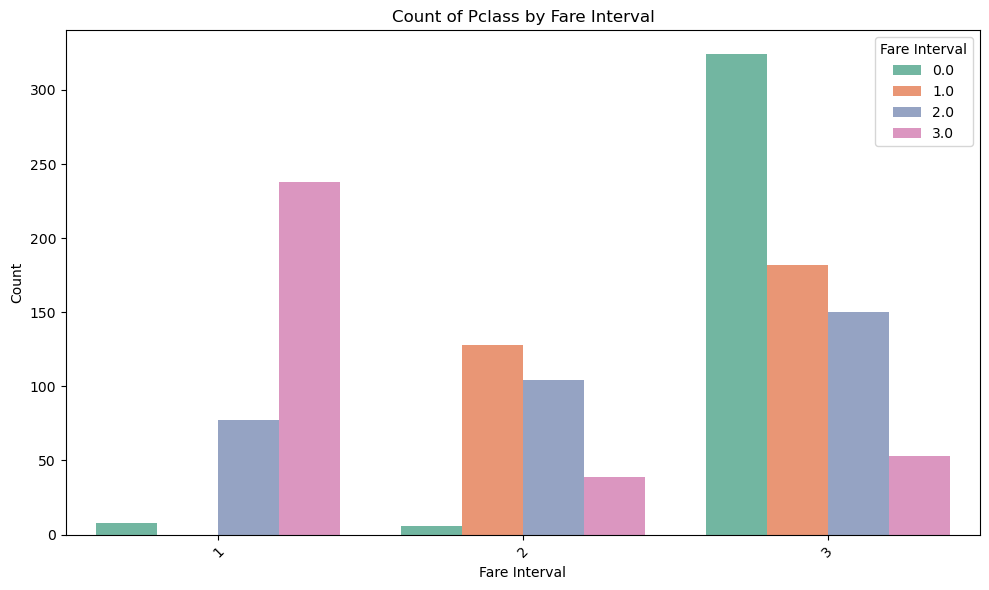

In [41]:
# TODO: Plot count pairs of "Pclass" grouped by "Fare Interval"
plt.figure(figsize=(10,6))
sns.countplot(data=all_df, x="Pclass", hue="Fare Interval", palette="Set2")
plt.title("Count of Pclass by Fare Interval")
plt.xlabel("Fare Interval")
plt.ylabel("Count")
plt.legend(title="Fare Interval")
plt.xticks(rotation=45)  # rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [4]:
survival_rate(train_df)

,Titles,Sex,Survived
0,Master.,male,0.575000
1,Miss.,female,0.702703
2,Mr.,male,0.156673
3,Mrs.,female,0.793651
4,Rare,female,1.000000
5,Rare,male,0.250000
